In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
df=pd.read_csv("/Users/prateekb/Downloads/MyPrograms/Certification/WIP/Machine Learning/NB_SVM/pacific.csv")

#sns.countplot(df['Status'])
#plt.show

#its a imbalancedData so drop some columns
#print((df['Status']).value_counts())
#print(df['Status'].unique())
rowToDrop=df[(df['Status']==' SS') | (df['Status']==' ST') | (df['Status']==' PT')
            | (df['Status']==' SD') | (df['Status']==' HU')].index
df=df.drop(rowToDrop,axis=0)
#print(df['Status'].unique())
df=df.drop(['ID','Name','Date','Time','Event','Latitude','Longitude'],axis=1)
X=df.iloc[:,1:17]

In [42]:
Y=df['Status']
#df.Status=pd.Categorical(df.Status)
#Y=df.Status.cat.codes
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(Y)
Y=le.transform(Y)

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=42)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gb=GaussianNB()
gb.fit(X_train,Y_train)
Y_pred=gb.predict(X_test)
Y_pred_train=gb.predict(X_train)

print("The training accuracy score is: ",accuracy_score(Y_train,Y_pred_train))
print("The test accuracy score is: ",accuracy_score(Y_test,Y_pred))

The training accuracy score is:  0.03178499903094515
The test accuracy score is:  0.030232558139534883


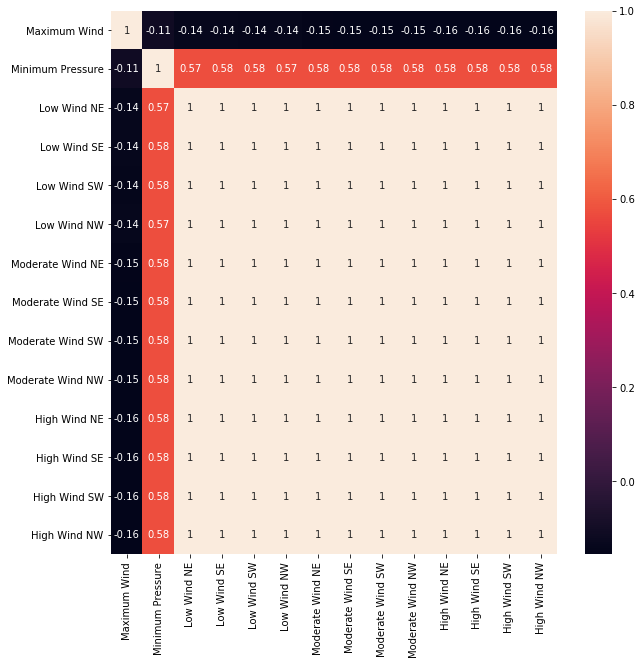

In [48]:
corr=X.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

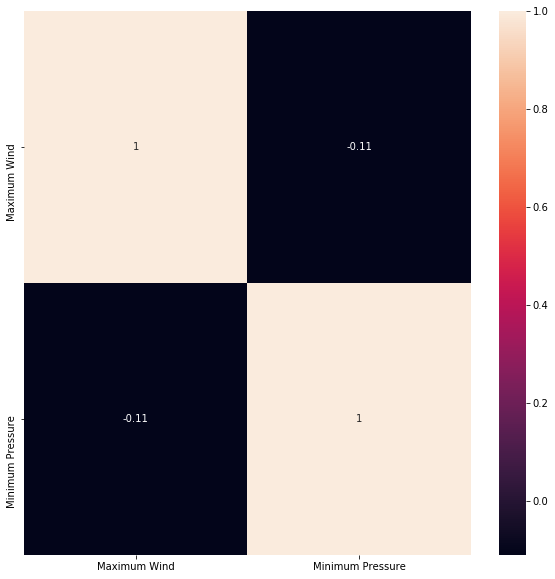

The training accuracy score is:  0.7800891530460624
The test accuracy score is:  0.7656330749354006


In [62]:
X=df.iloc[:,1:3]
corr=X.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=42)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gb=GaussianNB()
gb.fit(X_train,Y_train)
Y_pred=gb.predict(X_test)
Y_pred_train=gb.predict(X_train)

print("The training accuracy score is: ",accuracy_score(Y_train,Y_pred_train))
print("The test accuracy score is: ",accuracy_score(Y_test,Y_pred))

In [66]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
sv=SVC(kernel='poly')
sv.fit(X_train,Y_train)
Y_pred=sv.predict(X_test)
Y_pred_train=sv.predict(X_train)

print("The training accuracy score is: ",accuracy_score(Y_train,Y_pred_train))
print("The test accuracy score is: ",accuracy_score(Y_test,Y_pred))

The training accuracy score is:  0.8495380838555462
The test accuracy score is:  0.8434108527131783


In [73]:
from sklearn.model_selection import GridSearchCV
s=SVC()
parameters=[{'C':[.1,1,10,100,1000],'kernel':['rbf']},
           {'C':[.1,1,10,100,1000],'kernel':['poly']}]
gs=GridSearchCV(estimator=s,param_grid=parameters,
               scoring='accuracy',cv=10,n_jobs=1)
gd=gs.fit(X_train,Y_train)

/Users/prateekb/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


KeyboardInterrupt: 

In [74]:
gd.best_score_

NameError: name 'gd' is not defined